---

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

Vegas = pd.read_csv('../vegas.csv')
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_98098/778092029.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()


In [2]:
Vegas.columns

Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

In [3]:
# group by
# aggregation

In [5]:
by_hotel = Vegas.groupby(Vegas.hotel_name)

In [7]:
by_hotel.sample(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
443,USA,32,5,11,4,Jun-Aug,Business,YES,YES,NO,YES,YES,YES,Bellagio Las Vegas,5,3933,North America,6,June,Sunday
446,USA,11,8,2,4,Jun-Aug,Solo,YES,YES,NO,YES,YES,YES,Bellagio Las Vegas,5,3933,North America,0,August,Monday
449,USA,62,13,31,4,Sep-Nov,Business,YES,YES,NO,YES,YES,YES,Bellagio Las Vegas,5,3933,North America,2,September,Tuesday
447,Scotland,102,25,37,5,Jun-Aug,Families,YES,YES,NO,YES,YES,YES,Bellagio Las Vegas,5,3933,Europe,6,August,Sunday
441,UK,15,6,17,5,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Bellagio Las Vegas,5,3933,Europe,1,May,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Canada,7,5,20,4,Dec-Feb,Couples,YES,YES,YES,YES,YES,YES,Wynn Las Vegas,5,2700,North America,3,February,Saturday
210,USA,142,17,31,4,Sep-Nov,Couples,YES,YES,YES,YES,YES,YES,Wynn Las Vegas,5,2700,North America,3,October,Monday
199,USA,11,7,10,4,Mar-May,Couples,YES,YES,YES,YES,YES,YES,Wynn Las Vegas,5,2700,North America,1,April,Monday
212,Costa Rica,15,9,3,5,Sep-Nov,Business,YES,YES,YES,YES,YES,YES,Wynn Las Vegas,5,2700,North America,2,November,Monday


In [10]:
by_hotel[['free_internet', 'hotel_name']]

In [11]:
Vegas.hotel_name.unique()

array(['Circus Circus Hotel & Casino Las Vegas',
       'Excalibur Hotel & Casino', 'Monte Carlo Resort&Casino',
       'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel',
       'Caesars Palace', 'The Cosmopolitan Las Vegas',
       'The Palazzo Resort Hotel Casino', 'Wynn Las Vegas',
       'Trump International Hotel Las Vegas', 'The Cromwell',
       'Encore at wynn Las Vegas',
       'Hilton Grand Vacations on the Boulevard',
       "Marriott's Grand Chateau", 'Tuscany Las Vegas Suites & Casino',
       'Hilton Grand Vacations at the Flamingo', 'Wyndham Grand Desert',
       'The Venetian Las Vegas Hotel', 'Bellagio Las Vegas',
       'Paris Las Vegas', 'The Westin las Vegas Hotel Casino & Spa'],
      dtype=object)

In [12]:
sample_group = by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

In [14]:
sample_group.head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [15]:
type(sample_group)

pandas.core.frame.DataFrame

In [21]:
def top_reviewers(coredf):
    return coredf.sort_values(by = "nr_reviews", ascending = False).iloc[:3, :5 ]

In [22]:
top_reviewers(sample_group).head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score
15,New Zeland,146,17,33,4
1,USA,119,21,75,3
10,USA,102,24,58,2


---

In [20]:
Vegas.head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


---

In [23]:
top_reviewers(Vegas)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score
221,USA,775,52,255,3
339,USA,608,117,319,5
48,UK,576,43,340,3


In [24]:
by_hotel.apply(top_reviewers)

user_country  nr_reviews  nr_hotel_reviews  \
hotel_name                                                            
Bellagio Las Vegas   447     Scotland         102                25   
                     445        Korea          77                18   
                     449          USA          62                13   
Caesars Palace       121          USA         161                33   
                     122  Puerto Rico         153                38   
...                               ...         ...               ...   
Wyndham Grand Desert 406          USA         289                28   
                     405          USA         182                24   
Wynn Las Vegas       192          USA         164                48   
                     210          USA         142                17   
                     198          USA         125                35   

                          helpful_votes  score  
hotel_name                                      
Bellagio Las Vegas   447             37      5  
                     445             48      4  
                     449             31      4  
Caesars Palace       121             85      4  
                     122             81      5  
...                                 ...    ...  
Wyndham Grand Desert 406            133      4  
                     405             47      4  
Wynn Las Vegas       192             82      5  
                     210             31      4  
                     198             48      5  

[63 rows x 5 columns]

In [26]:
by_hotel.apply(top_reviewers)

user_country  nr_reviews  nr_hotel_reviews  \
hotel_name                                                            
Bellagio Las Vegas   447     Scotland         102                25   
                     445        Korea          77                18   
                     449          USA          62                13   
Caesars Palace       121          USA         161                33   
                     122  Puerto Rico         153                38   
...                               ...         ...               ...   
Wyndham Grand Desert 406          USA         289                28   
                     405          USA         182                24   
Wynn Las Vegas       192          USA         164                48   
                     210          USA         142                17   
                     198          USA         125                35   

                          helpful_votes  score  
hotel_name                                      
Bellagio Las Vegas   447             37      5  
                     445             48      4  
                     449             31      4  
Caesars Palace       121             85      4  
                     122             81      5  
...                                 ...    ...  
Wyndham Grand Desert 406            133      4  
                     405             47      4  
Wynn Las Vegas       192             82      5  
                     210             31      4  
                     198             48      5  

[63 rows x 5 columns]

In [27]:
def score_detail(groupdf):
    return groupdf.score.value_counts(normalize = True)

In [28]:
score_detail(sample_group)

4   0.38
3   0.29
2   0.17
5   0.08
1   0.08
Name: score, dtype: float64

In [29]:
by_hotel.apply(score_detail)

hotel_name             
Bellagio Las Vegas    5   0.50
                      4   0.33
                      2   0.12
                      3   0.04
Caesars Palace        5   0.50
                          ... 
Wyndham Grand Desert  3   0.12
Wynn Las Vegas        5   0.75
                      4   0.17
                      3   0.04
                      2   0.04
Name: score, Length: 85, dtype: float64

In [30]:
by_hotel.apply(score_detail).unstack()

,1,2,3,4,5
hotel_name,,,,,
Bellagio Las Vegas,NaN,0.12,0.04,0.33,0.50
Caesars Palace,0.08,NaN,0.12,0.29,0.50
Circus Circus Hotel & Casino Las Vegas,0.08,0.17,0.29,0.38,0.08
Encore at wynn Las Vegas,0.04,NaN,0.04,0.21,0.71
Excalibur Hotel & Casino,NaN,0.04,0.38,0.42,0.17
Hilton Grand Vacations at the Flamingo,NaN,0.08,0.25,0.29,0.38
Hilton Grand Vacations on the Boulevard,0.04,0.08,0.04,0.33,0.50
Marriott's Grand Chateau,NaN,NaN,0.04,0.38,0.58
Monte Carlo Resort&Casino,0.04,0.21,0.25,0.42,0.08


In [31]:
by_hotel.apply(score_detail).unstack().fillna(0)

,1,2,3,4,5
hotel_name,,,,,
Bellagio Las Vegas,0.00,0.12,0.04,0.33,0.50
Caesars Palace,0.08,0.00,0.12,0.29,0.50
Circus Circus Hotel & Casino Las Vegas,0.08,0.17,0.29,0.38,0.08
Encore at wynn Las Vegas,0.04,0.00,0.04,0.21,0.71
Excalibur Hotel & Casino,0.00,0.04,0.38,0.42,0.17
Hilton Grand Vacations at the Flamingo,0.00,0.08,0.25,0.29,0.38
Hilton Grand Vacations on the Boulevard,0.04,0.08,0.04,0.33,0.50
Marriott's Grand Chateau,0.00,0.00,0.04,0.38,0.58
Monte Carlo Resort&Casino,0.04,0.21,0.25,0.42,0.08


In [42]:
def score_detail2(groupdf):
    return pd.DataFrame(groupdf.score.value_counts(normalize=True))

In [43]:
type(sample_group)

pandas.core.frame.DataFrame

In [44]:
score_detail2(sample_group)

,score
4,0.38
3,0.29
2,0.17
5,0.08
1,0.08


In [39]:
type(by_hotel)

pandas.core.groupby.generic.DataFrameGroupBy

In [45]:
score_detail2(by_hotel)

score
hotel_name           score       
Bellagio Las Vegas   5       0.50
                     4       0.33
                     2       0.12
                     3       0.04
Caesars Palace       5       0.50
...                           ...
Wyndham Grand Desert 3       0.12
Wynn Las Vegas       5       0.75
                     4       0.17
                     2       0.04
                     3       0.04

[85 rows x 1 columns]

In [46]:
score_detail2(by_hotel).unstack().fillna(0)

score                    
score                                                  1    2    3    4    5
hotel_name                                                                  
Bellagio Las Vegas                                  0.00 0.12 0.04 0.33 0.50
Caesars Palace                                      0.08 0.00 0.12 0.29 0.50
Circus Circus Hotel & Casino Las Vegas              0.08 0.17 0.29 0.38 0.08
Encore at wynn Las Vegas                            0.04 0.00 0.04 0.21 0.71
Excalibur Hotel & Casino                            0.00 0.04 0.38 0.42 0.17
Hilton Grand Vacations at the Flamingo              0.00 0.08 0.25 0.29 0.38
Hilton Grand Vacations on the Boulevard             0.04 0.08 0.04 0.33 0.50
Marriott's Grand Chateau                            0.00 0.00 0.04 0.38 0.58
Monte Carlo Resort&Casino                           0.04 0.21 0.25 0.42 0.08
Paris Las Vegas                                     0.00 0.12 0.12 0.33 0.42
The Cosmopolitan Las Vegas                          0.04 0.12 0.00 0.21 0.62
The Cromwell                                        0.04 0.08 0.12 0.25 0.50
The Palazzo Resort Hotel Casino                     0.00 0.00 0.17 0.29 0.54
The Venetian Las Vegas Hotel                        0.00 0.00 0.04 0.33 0.62
The Westin las Vegas Hotel Casino & Spa             0.00 0.04 0.25 0.46 0.25
Treasure Island- TI Hotel & Casino                  0.00 0.00 0.25 0.54 0.21
Tropicana Las Vegas - A Double Tree by Hilton H...  0.04 0.04 0.12 0.42 0.38
Trump International Hotel Las Vegas                 0.04 0.04 0.04 0.25 0.62
Tuscany Las Vegas Suites & Casino                   0.00 0.04 0.25 0.17 0.54
Wyndham Grand Desert                                0.00 0.00 0.12 0.38 0.50
Wynn Las Vegas                                      0.00 0.04 0.04 0.17 0.75

In [47]:
score_detail2(by_hotel).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 85 entries, ('Bellagio Las Vegas', 5) to ('Wynn Las Vegas', 3)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   85 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [48]:
def score_detail2(groupdf):
    #return groupdf.score.value_counts(normalize = True)
    return pd.DataFrame(groupdf.score.value_counts(normalize = True))

In [49]:
score_detail2(sample_group)

,score
4,0.38
3,0.29
2,0.17
5,0.08
1,0.08


In [50]:
def score_detail2(groupdf):
    #return groupdf.score.value_counts(normalize = True)
    return pd.DataFrame(groupdf.score.value_counts(normalize = True)).T

In [51]:
score_detail2(sample_group)

,4,3,2,5,1
score,0.38,0.29,0.17,0.08,0.08


In [52]:
by_hotel.apply(score_detail2)

,,5,4,2,3,1
hotel_name,,,,,,
Bellagio Las Vegas,score,0.50,0.33,0.12,0.04,NaN
Caesars Palace,score,0.50,0.29,NaN,0.12,0.08
Circus Circus Hotel & Casino Las Vegas,score,0.08,0.38,0.17,0.29,0.08
Encore at wynn Las Vegas,score,0.71,0.21,NaN,0.04,0.04
Excalibur Hotel & Casino,score,0.17,0.42,0.04,0.38,NaN
Hilton Grand Vacations at the Flamingo,score,0.38,0.29,0.08,0.25,NaN
Hilton Grand Vacations on the Boulevard,score,0.50,0.33,0.08,0.04,0.04
Marriott's Grand Chateau,score,0.58,0.38,NaN,0.04,NaN
Monte Carlo Resort&Casino,score,0.08,0.42,0.21,0.25,0.04


In [53]:
by_hotel.apply(score_detail2).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, ('Bellagio Las Vegas', 'score') to ('Wynn Las Vegas', 'score')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       21 non-null     float64
 1   4       21 non-null     float64
 2   2       14 non-null     float64
 3   3       20 non-null     float64
 4   1       9 non-null      float64
dtypes: float64(5)
memory usage: 1.8+ KB


In [57]:
by_hotel.apply(score_detail2).reset_index(level = 1, drop = True).fillna(0)

,5,4,2,3,1
hotel_name,,,,,
Bellagio Las Vegas,0.50,0.33,0.12,0.04,0.00
Caesars Palace,0.50,0.29,0.00,0.12,0.08
Circus Circus Hotel & Casino Las Vegas,0.08,0.38,0.17,0.29,0.08
Encore at wynn Las Vegas,0.71,0.21,0.00,0.04,0.04
Excalibur Hotel & Casino,0.17,0.42,0.04,0.38,0.00
Hilton Grand Vacations at the Flamingo,0.38,0.29,0.08,0.25,0.00
Hilton Grand Vacations on the Boulevard,0.50,0.33,0.08,0.04,0.04
Marriott's Grand Chateau,0.58,0.38,0.00,0.04,0.00
Monte Carlo Resort&Casino,0.08,0.42,0.21,0.25,0.04


In [58]:
score_df = by_hotel.apply(score_detail2).reset_index(level = 1, drop = True).fillna(0)

In [59]:
score_df

,5,4,2,3,1
hotel_name,,,,,
Bellagio Las Vegas,0.50,0.33,0.12,0.04,0.00
Caesars Palace,0.50,0.29,0.00,0.12,0.08
Circus Circus Hotel & Casino Las Vegas,0.08,0.38,0.17,0.29,0.08
Encore at wynn Las Vegas,0.71,0.21,0.00,0.04,0.04
Excalibur Hotel & Casino,0.17,0.42,0.04,0.38,0.00
Hilton Grand Vacations at the Flamingo,0.38,0.29,0.08,0.25,0.00
Hilton Grand Vacations on the Boulevard,0.50,0.33,0.08,0.04,0.04
Marriott's Grand Chateau,0.58,0.38,0.00,0.04,0.00
Monte Carlo Resort&Casino,0.08,0.42,0.21,0.25,0.04


In [60]:
import seaborn as sns

<AxesSubplot:ylabel='hotel_name'>

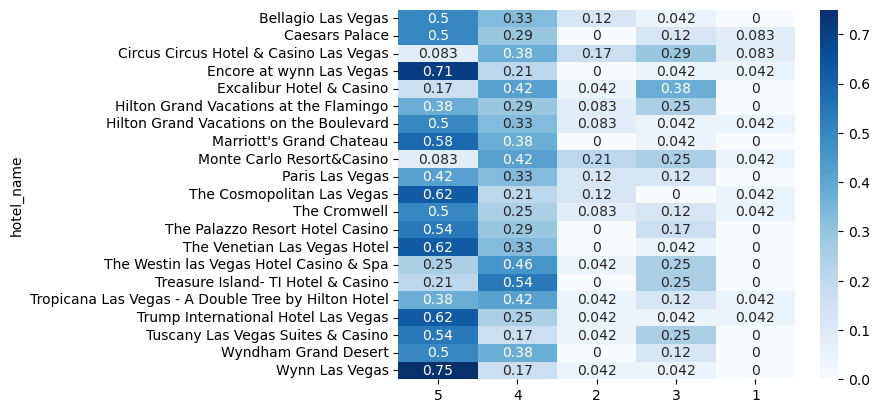

In [61]:
sns.heatmap(score_df, annot = True, cmap = 'Blues')

In [63]:
Vegas.user_country.value_counts()

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Egypt                     5
Brazil                    5
New Zeland                5
Singapore                 4
Netherlands               4
Norway                    3
Israel                    3
Malaysia                  3
Hawaii                    3
Thailand                  3
Finland                   3
Spain                     2
United Arab Emirates      2
Scotland                  2
Switzerland               2
Costa Rica                2
Kenya                     1
Korea                     1
Japan                     1
Czech Republic            1
Kuwait                    1
Taiwan                    1
Denmark                   1
Honduras                  1
Saudi Arabia              1
Iran                      1
China                     1
Jordan              

In [64]:
Vegas.columns

Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

In [66]:
Vegas.user_continent.value_counts()

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: user_continent, dtype: int64

In [67]:
Vegas.member_years.value_counts()

 3       63
 1       61
 4       60
 5       60
 2       55
 6       41
 7       41
 0       39
 8       32
 9       21
 10      19
 11       8
 12       2
-1806     1
 13       1
Name: member_years, dtype: int64

In [73]:
Vegas[Vegas['member_years']== 6].head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
35,Finland,20,7,4,3,Jun-Aug,Couples,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,Europe,6,June,Saturday
36,USA,70,27,24,4,Jun-Aug,Friends,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,North America,6,July,Friday
44,USA,35,8,19,4,Sep-Nov,Families,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,North America,6,November,Sunday
72,Croatia,29,11,14,3,Dec-Feb,Business,YES,YES,YES,YES,YES,YES,Treasure Island- TI Hotel & Casino,4,2884,Europe,6,January,Sunday


In [74]:
def country_counts(df):
    return df.user_country.value_counts()

In [75]:
country_counts(sample_group)

USA           10
UK             5
Canada         5
New Zeland     2
India          1
Australia      1
Name: user_country, dtype: int64

In [77]:
country_counts(Vegas).head(10)

USA          217
UK            72
Canada        65
Australia     36
Ireland       13
India         11
Mexico         8
Germany        7
Egypt          5
Brazil         5
Name: user_country, dtype: int64

In [78]:
def country_counts(df):
    return df.user_country.value_counts(normalize = True)

In [79]:
country_counts(Vegas).head(10)

USA         0.43
UK          0.14
Canada      0.13
Australia   0.07
Ireland     0.03
India       0.02
Mexico      0.02
Germany     0.01
Egypt       0.01
Brazil      0.01
Name: user_country, dtype: float64

In [80]:
by_hotel.apply(country_counts)

hotel_name                    
Bellagio Las Vegas  USA          0.33
                    UK           0.25
                    India        0.08
                    Ireland      0.08
                    Australia    0.04
                                 ... 
Wynn Las Vegas      Canada       0.21
                    UK           0.17
                    Singapore    0.04
                    Finland      0.04
                    Costa Rica   0.04
Name: user_country, Length: 182, dtype: float64

In [85]:
x = by_hotel.apply(country_counts).unstack().fillna(0)

In [89]:
type(x)

pandas.core.frame.DataFrame

In [91]:
x.head(5)

,Australia,Belgium,Brazil,Canada,China,Costa Rica,Croatia,Czech Republic,Denmark,Egypt,...,South Africa,Spain,Swiss,Switzerland,Syria,Taiwan,Thailand,UK,USA,United Arab Emirates
hotel_name,,,,,,,,,,,,,,,,,,,,,
Bellagio Las Vegas,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.25,0.33,0.00
Caesars Palace,0.08,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.58,0.00
Circus Circus Hotel & Casino Las Vegas,0.04,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.42,0.00
Encore at wynn Las Vegas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.29,0.58,0.00
Excalibur Hotel & Casino,0.08,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.12,0.25,0.00


In [96]:
x[8:10]

,Australia,Belgium,Brazil,Canada,China,Costa Rica,Croatia,Czech Republic,Denmark,Egypt,...,South Africa,Spain,Swiss,Switzerland,Syria,Taiwan,Thailand,UK,USA,United Arab Emirates
hotel_name,,,,,,,,,,,,,,,,,,,,,
Monte Carlo Resort&Casino,0.04,0.00,0.00,0.08,0.04,0.00,0.00,0.00,0.00,0.00,...,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.17,0.25,0.04
Paris Las Vegas,0.04,0.00,0.00,0.21,0.00,0.04,0.00,0.00,0.00,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.62,0.00


In [101]:
top_countries = Vegas.user_country.value_counts().index.values[:10]

In [102]:
top_countries

array(['USA', 'UK', 'Canada', 'Australia', 'Ireland', 'India', 'Mexico',
       'Germany', 'Egypt', 'Brazil'], dtype=object)

In [107]:
def country_counts(df):
    return df.user_country.value_counts(normalize = True)[top_countries]

In [106]:
country_counts(sample_group)

TypeError: 'Series' object is not callable